# Analyze pendulum data
Use this notebook to quickly test whether your pendulum data makes sense!

In [21]:
# Imports
import numpy as np
import matplotlib.pyplot as plt
from iminuit import Minuit
from iminuit import cost
from scipy import stats

In [22]:
# Example file location
filenames = ["pendulum-timing/Laurits.dat", "pendulum-timing/Martin.dat",
                    "pendulum-timing/Sofie.dat", "pendulum-timing/Timer.dat", "pendulum-timing/Timer2.dat"]

## Data reader

In [23]:
# Read in data
def read_data(filename):
    dat = np.genfromtxt(filename, delimiter='\t', names=('n', 't_s'))
    return dat

def linear_fit(x, a ,b):
    return a*x + b

def constant_fit(x, c):
    return np.ones(len(x))*c

## Read and plot the data

In [24]:
data_list = [read_data(file) for file in filenames]
n, t = [data['n'] for data in data_list], [data['t_s'] for data in data_list]
t[3] = t[3][3:]  # Throwing away these datapoints
n[3] = n[3][:-3]

periods = [np.diff(times) for times in t]

all_periods = np.array([value for arr in periods for value in arr])

In [33]:
T = np.zeros(len(n))
sig_T = np.zeros(len(n))
sig_t = np.zeros(len(n))

for idx in range(len(n)):
    #Fitting
    mfit = cost.LeastSquares(n[idx], t[idx], 1, linear_fit)
    mfit = Minuit(mfit, a = 10, b = 10)
    mfit.migrad()

    residual = t[idx] - linear_fit(n[idx], mfit.values[0], mfit.values[1])
    sig_t[idx] = np.std(residual)
    mfit = cost.LeastSquares(n[idx], t[idx], sig_t[idx], linear_fit)
    mfit = Minuit(mfit, a = 10, b = 10)
    mfit.migrad()

    T[idx] = mfit.values[0]
    sig_T[idx] = mfit.errors[0]

weighted_T = np.average(T, weights = 1/(sig_T**2))
weighted_sig_T = np.sqrt(1.0/np.sum(1.0/sig_T**2))
print(f"Period = {weighted_T:.4f} +- {weighted_sig_T:.4f})")

chi2_value = np.sum(((weighted_T - T)/sig_T)**2)
prob = stats.chi2.sf(chi2_value, len(T)-1)
print(chi2_value, prob)
print(sig_t)

Period = 9.4102 +- 0.0003)
230.12510639361142 1.2406811761193384e-48
[0.03910689 0.03329891 0.03364233 0.03070931 0.01971111]


Text(0.5, 0, 'Index')

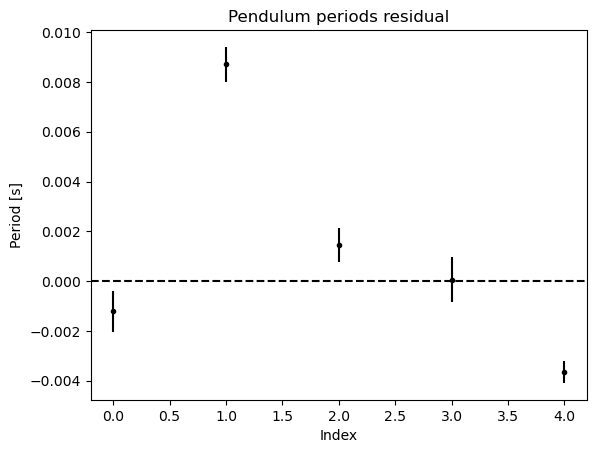

In [42]:
Tfit = cost.LeastSquares(np.arange(len(T)), T, sig_T, constant_fit)
Tfit = Minuit(Tfit, c = 10)
Tfit.migrad()
chi_T = Tfit.values[0]
chi_T_err = Tfit.errors[0]

residual = T - constant_fit(np.arange(len(T)), chi_T)
plt.errorbar(np.arange(len(T)), residual, yerr = sig_T, fmt=".k")
plt.axhline(y = 0, color = "black", linestyle = "--")
plt.title("Pendulum periods residual")
plt.ylabel("Period [s]")
plt.xlabel("Index")

C:\Users\Bruger\AppData\Local\Temp\ipykernel_33904\696318463.py:18: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax[0].legend(title="\n".join(fit_info), fontsize=18, title_fontsize = 18, alignment = 'center');


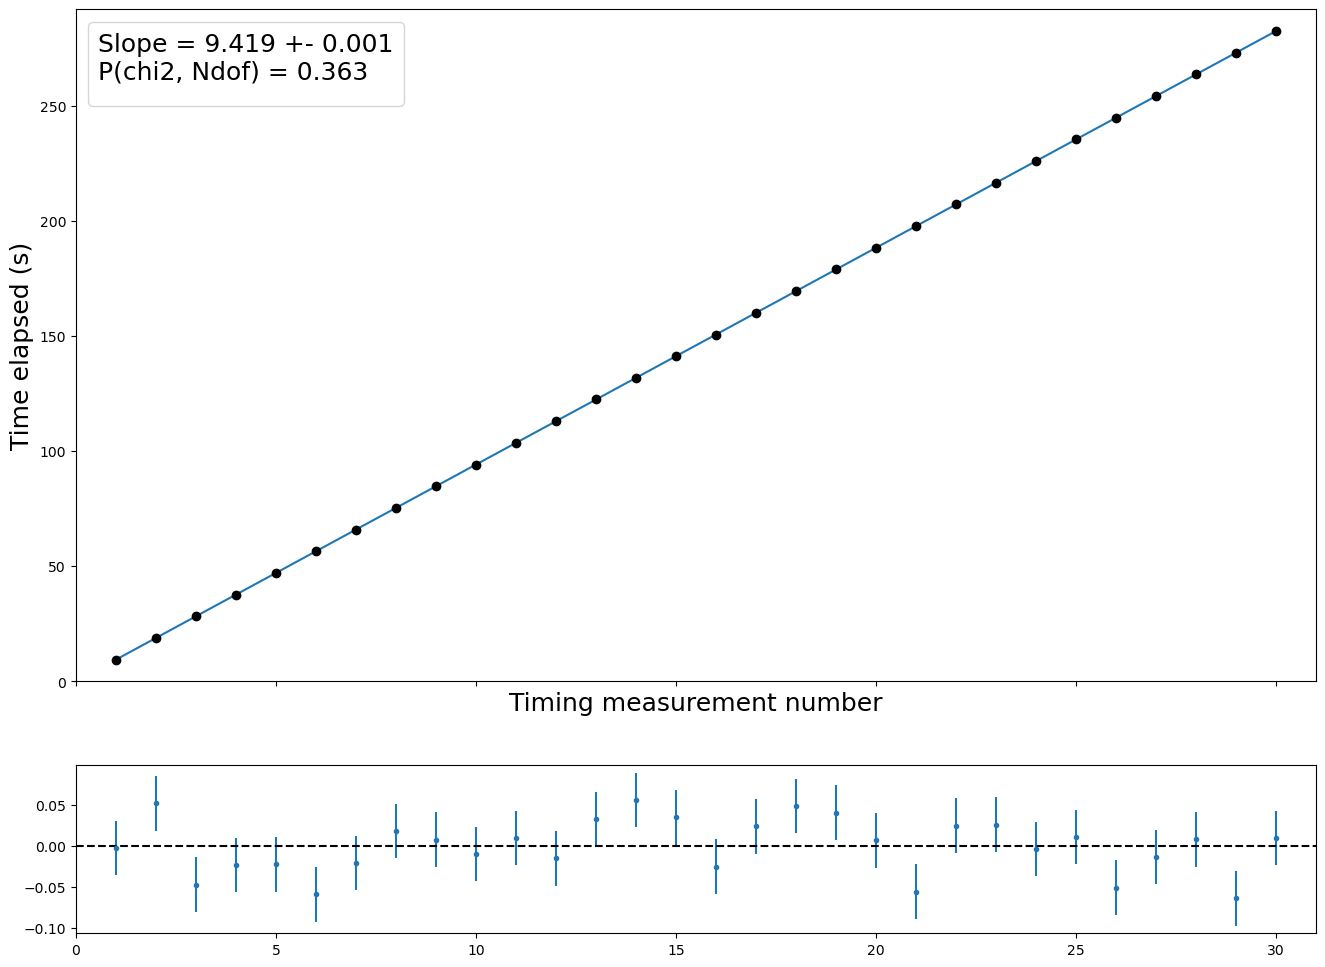

In [32]:
idx = 1
#Fitting
mfit = cost.LeastSquares(n[idx], t[idx], sig_t[idx], linear_fit)
mfit = Minuit(mfit, a = 10, b = 10)
mfit.migrad()
slope, const = mfit.values[:]
eslope, econst = mfit.errors[:]
p = stats.chi2.sf(mfit.fval, len(t[idx]) - len(mfit.values))

# Plotting
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(16, 12), gridspec_kw={'height_ratios':[4,1]}, sharex=True)
ax[0].errorbar(n[idx], t[idx], yerr=sig_t[idx], color='k', fmt='o')
ax[0].plot(n[idx], linear_fit(n[idx], slope, const))
ax[0].set_xlabel('Timing measurement number', fontsize=18)
ax[0].set_ylabel('Time elapsed (s)', fontsize=18)
ax[0].set(xlim=(0, n[idx][-1]+np.ediff1d(n[idx])[0]), ylim=(0, t[idx][-1]+np.ediff1d(t[idx])[0]))
fit_info = [f"Slope = {slope:.3f} +- {eslope:.3f}", f"P(chi2, Ndof) = {p:.3f}"]
ax[0].legend(title="\n".join(fit_info), fontsize=18, title_fontsize = 18, alignment = 'center');

residual = np.array(t[idx]) - linear_fit(np.array(n[idx]), slope, const)
ax[1].errorbar(n[idx], residual, yerr = sig_t[idx], fmt = ".")
ax[1].axhline(y = 0, linestyle = "--", color = "black")



In [28]:
h_laser_arr = np.array([22.254,22.261,22.259,22.261,22.257])
h_laser = np.mean(h_laser_arr)
h_laser_err = np.std(h_laser_arr)/np.sqrt(len(h_laser_arr))

length_lod_top, lod_top_err =[11.43e-2, 0.1150, 0.1149, 0.1145], [0.1e-2, 0.0001]
length_lod, lod_err =[2.98e-2, 0.0294, 0.0305, 0.0295], [0.1e-2, 0.0001]

l_pendulum = h_laser - np.mean(length_lod_top) + 0.5*np.mean(length_lod)
l_pendulum_err = np.sqrt(h_laser_err**2 + (np.std(length_lod_top)/np.sqrt(len(length_lod_top)))**2
                         + (0.5*np.std(length_lod)/np.sqrt(len(length_lod))**2))
print(f"Pendulum length = {l_pendulum:.3f} +- {l_pendulum_err:.3f}")

Pendulum length = 22.159 +- 0.007


In [ ]:
r = np.random
r.seed(42)
g_blind = r.normal(1, 1)
g = l_pendulum*(2*np.pi/chi_T)**2
# g = g + g_blind
print(l_pendulum_err, chi_T_err)
g_err = np.sqrt(((2*np.pi/chi_T)**2 * l_pendulum_err)**2 + (l_pendulum*8*np.pi**2/chi_T**3 * chi_T_err)**2)
print(f"g = {g:.3f} +- {g_err:.3f}")

0.007429199261630793 0.00028710052544672306
g = 9.879 +- 0.003


In [ ]:
# Separate periods
g = l_pendulum*(2*np.pi/T)**2
# g = g + g_blind
g_err = np.sqrt(((2*np.pi/T)**2 * l_pendulum_err)**2 + (l_pendulum*8*np.pi**2/T**3 * sig_T)**2)
print(f"g = {g} +- {g_err}")

g = [9.88129301 9.86048574 9.87571957 9.87861071 9.88641678] +- [0.00373865 0.00361831 0.00360182 0.00381895 0.00343985]


# What to do next?

The reason for the (empty) plot below is, that though your data (hopefully) lies on a line, you're not able to see any smaller effects. However, if you plot the __residuals__ (the difference between your measurements and a fit to them), then you will much better be able to tell, if the data looks good. Also, it is from a historgram of the residuals, that you can determine, if your errors are Gaussian (or have any obvious outliers), and from the Standard Deviation what your (typical) uncertainty is.